# Aplicando Python para análisis de precios: descarga, manejo y análisis de datos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="100px" />

> En esta y en las siguientes dos clases veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos (en esta clase) como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en structuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace menos de una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

## 1. Descarga de datos de Yahoo! Finance
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [2]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like # Explicar
import pandas_datareader.data as web

In [3]:
# Librerías estándar para arreglos y gráficos
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Ver la siguiente función...

In [7]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes(tickers, start_date=None, end_date=None, freq='d'):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [5]:
# Instrumentos a descargar (Apple, Walmart, IBM, Nike)
names = ['AAPL', 'WMT', 'IBM', 'NKE']
# Fechas: inicios 2011 a finales de 2015
start, end = '2011-01-01', '2015-12-31'

#### La api de yahoo es inestable. Puede ser que nos toque intentar varias veces antes de tener éxito

In [11]:
# Obtenemos los precios ajustados en el cierre
closes = get_closes(names, start, end)
closes

,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-03,31.528688,44.672379,115.349991,17.053955
2011-01-04,31.693233,44.844315,115.475121,16.633993
2011-01-05,31.952478,44.549557,115.013687,16.742945
2011-01-06,31.926651,44.181110,116.272919,16.592394
2011-01-07,32.155293,44.279354,115.701958,16.546825
2011-01-10,32.760860,43.992786,115.475121,16.673615
2011-01-11,32.683372,44.451313,115.193558,16.643900
2011-01-12,32.949322,44.909821,116.617027,16.586447
2011-01-13,33.069874,44.860695,116.398079,16.354683


¿Cómo lucen estos datos?

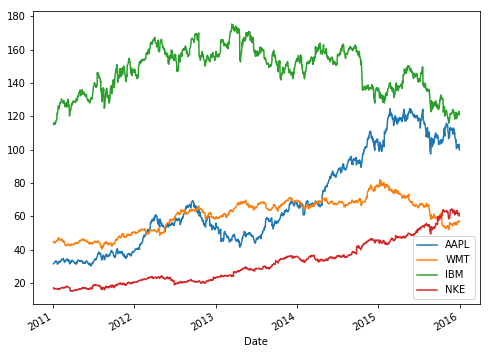

In [12]:
# Graficar
closes.plot(figsize=(8,6));

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

In [13]:
# Método describe
closes.describe()

,AAPL,WMT,IBM,NKE
count,1258.000000,1258.000000,1258.000000,1258.000000
mean,68.261260,60.735180,147.416557,31.792526
std,28.674670,10.098794,13.692983,13.069240
min,30.165447,40.469486,115.013687,15.159040
25%,45.894773,51.459160,136.324661,20.758722
50%,59.133622,63.774992,150.349754,28.643888
75%,94.024999,68.075975,157.759411,40.909220
max,124.616013,81.894302,175.264389,64.467720


## 2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [14]:
# Método shift
closes.shift()

,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-03,NaN,NaN,NaN,NaN
2011-01-04,31.528688,44.672379,115.349991,17.053955
2011-01-05,31.693233,44.844315,115.475121,16.633993
2011-01-06,31.952478,44.549557,115.013687,16.742945
2011-01-07,31.926651,44.181110,116.272919,16.592394
2011-01-10,32.155293,44.279354,115.701958,16.546825
2011-01-11,32.760860,43.992786,115.475121,16.673615
2011-01-12,32.683372,44.451313,115.193558,16.643900
2011-01-13,32.949322,44.909821,116.617027,16.586447


In [16]:
# Entonces los rendimientos se calculan como
ret = ((closes-closes.shift())/closes.shift()).dropna()
ret

,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-04,0.005219,0.003849,0.001085,-0.024625
2011-01-05,0.008180,-0.006573,-0.003996,0.006550
2011-01-06,-0.000808,-0.008270,0.010949,-0.008992
2011-01-07,0.007161,0.002224,-0.004911,-0.002746
2011-01-10,0.018833,-0.006472,-0.001961,0.007662
2011-01-11,-0.002365,0.010423,-0.002438,-0.001782
2011-01-12,0.008137,0.010315,0.012357,-0.003452
2011-01-13,0.003659,-0.001094,-0.001877,-0.013973
2011-01-14,0.008100,0.000365,0.007929,0.018290


In [18]:
# Método pct_change
ret = closes.pct_change().dropna()
ret

,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-04,0.005219,0.003849,0.001085,-0.024625
2011-01-05,0.008180,-0.006573,-0.003996,0.006550
2011-01-06,-0.000808,-0.008270,0.010949,-0.008992
2011-01-07,0.007161,0.002224,-0.004911,-0.002746
2011-01-10,0.018833,-0.006472,-0.001961,0.007662
2011-01-11,-0.002365,0.010423,-0.002438,-0.001782
2011-01-12,0.008137,0.010315,0.012357,-0.003452
2011-01-13,0.003659,-0.001094,-0.001877,-0.013973
2011-01-14,0.008100,0.000365,0.007929,0.018290


y la gráfica de los rendimientos se puede obtener como...

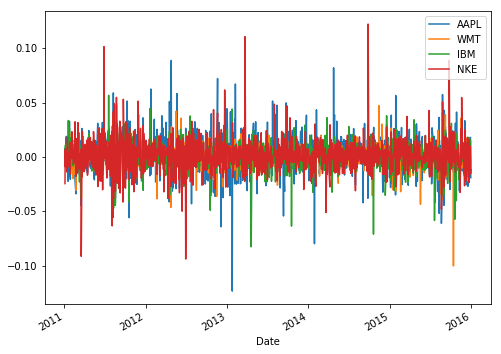

In [21]:
# Gráfica
ret.plot(figsize=(8,6));

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

In [24]:
# Rendimiento logarítmico
logret = np.log(closes/closes.shift()).dropna()
logret

,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-04,0.005205,0.003841,0.001084,-0.024934
2011-01-05,0.008147,-0.006595,-0.004004,0.006529
2011-01-06,-0.000809,-0.008305,0.010889,-0.009033
2011-01-07,0.007136,0.002221,-0.004923,-0.002750
2011-01-10,0.018657,-0.006493,-0.001962,0.007633
2011-01-11,-0.002368,0.010369,-0.002441,-0.001784
2011-01-12,0.008104,0.010262,0.012281,-0.003458
2011-01-13,0.003652,-0.001094,-0.001879,-0.014072
2011-01-14,0.008067,0.000365,0.007897,0.018125


In [25]:
# Gráfica


In [25]:
# Valor absoluto de la diferencia
np.abs(ret-logret)

,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-04,1.357125e-05,7.387762e-06,5.879546e-07,3.082789e-04
2011-01-05,3.327342e-05,2.169675e-05,8.005182e-06,2.135778e-05
2011-01-06,3.268458e-07,3.439031e-05,5.950136e-05,4.067118e-05
2011-01-07,2.552161e-05,2.468685e-06,1.209624e-05,3.778218e-06
2011-01-10,1.751375e-04,2.103302e-05,1.924352e-06,2.920782e-05
2011-01-11,2.801650e-06,5.394264e-05,2.977495e-06,1.589931e-06
2011-01-12,3.292822e-05,5.283491e-05,7.572690e-05,5.971537e-06
2011-01-13,6.676797e-06,5.987245e-07,1.764705e-06,9.854273e-05
2011-01-14,3.262577e-05,6.661131e-08,3.126621e-05,1.652467e-04


Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los log rendimientos son normales...

In [26]:
# Media y volatilidad de rendimientos
mu = ret.mean()
mu

AAPL    0.001062
WMT     0.000246
IBM     0.000112
NKE     0.001117
dtype: float64

In [27]:
desvest = ret.std()
desvest

AAPL    0.016996
WMT     0.010152
IBM     0.012133
NKE     0.015056
dtype: float64

In [28]:
mu.AAPL

0.0010619205319855672

___
Recapitulando, hoy aprendimos a obtener datos con pandas-datareader directamente desde fuentes remotas.

Por otra parte, estudiamos los rendimientos diarios y dimos con la conclusión de que se podrían modelar como un proceso estocástico estacionario normal.

La siguiente clase veremos como simular escenarios de comportamiento de los precios futuros (no determinístico, no sabemos como se comporta, muchas posibilidades: montecarlo) a partir de datos de ingresos diarios.

Luego, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima (debajo) de cierto umbral y con ello tomar decisiones de vender (comprar) estas acciones.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>